Linear Regression

1.  Downloading the dataset

In [2]:
from urllib.request import urlretrieve
medic_chgs = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
urlretrieve(medic_chgs, 'medical_chgs.csv')

('medical_chgs.csv', <http.client.HTTPMessage at 0x263a3c2bd90>)

2.  Exploratory Data Analysis

In [13]:
#loading dataframe
import pandas as pd
df = pd.read_csv('medical_chgs.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [4]:
# data statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape # 1338 rows with 7 features

(1338, 7)

In [6]:
stats = df.describe() # only for numerical variables
stats

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [87]:
import plotly.express as px
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [57]:
#Age


fg = px.histogram(df, x=['age'], marginal='box', title='Age Distribution', nbins=47)
fg.update_layout(bargap=0.1,width=1000, height=500)
fg.show()

In [58]:
#bmi

fg = px.histogram(df,x='bmi',title='BMI Distribution', color='smoker',marginal='box',color_discrete_sequence=['red', 'blue'])
fg.update_layout(bargap=0.1)
fg.show()

In [36]:
#charges
fg = px.histogram(df,x='charges',title='Charges Distribution', color='smoker',marginal='box',color_discrete_sequence=['green', 'orange'])
fg.update_layout(bargap=0.1)
fg.show()

In [43]:
#smoker
print(df.smoker.value_counts())

fg = px.histogram(df,x='smoker',title='BMI Distribution', color='sex',color_discrete_sequence=['red', 'blue'])
fg.update_layout(bargap=0.1)
fg.show()

smoker
no     1064
yes     274
Name: count, dtype: int64


In [45]:
# Age vs Charges

px.scatter(df, x='age', y='charges', title='Age v/s Charges', hover_data=['sex'], color='smoker')

In [54]:
#BMI v/s charges
px.scatter(df, x='bmi', y='charges', title='BMI v/s Charges', hover_data=['sex'], color='smoker')

In [75]:
#violin plot c

px.violin(df,x=['children'],y='charges',title='Children vs Charges')

In [78]:
#correlation
df.age.corr(df.charges)

np.float64(0.29900819333064776)

In [79]:
df.bmi.corr(df.charges)

np.float64(0.1983409688336289)

In [81]:
#for categorial columns
d = {'yes':1,'no':0}
df['smoker_bin'] = df['smoker'].map(d)
df.smoker_bin.corr(df.charges)

np.float64(0.7872514304984778)

In [84]:
#overall correlation
df.drop(columns=['smoker_bin'], inplace=True)
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

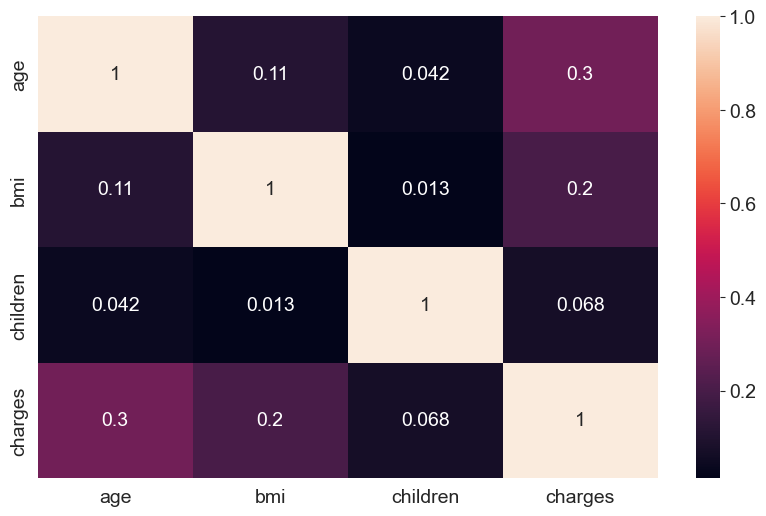

In [88]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

3.  Linear Regression using Single variable

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
#RMSE form

def rmse(targ, pred):
    return np.sqrt(np.mean(np.square(targ - pred)))

In [ ]:
#LR model for predict charges using age for non smokers

mod1 = LinearRegression()
inps = df[df['smoker'] == 'no'].loc[:,['age']]
targs = df[df['smoker'] == 'no'].loc[:,['charges']]
px.scatter(x=inps['age'], y=targs['charges'], title='non smoker')

In [ ]:
mod1.fit(inps, targs)
mod1.predict(np.array([[25],[34],[31]]))

c:\Users\FLEMIN P DANIEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[4589.80226421],
       [6995.0424797 ],
       [6193.2957412 ]])

In [ ]:
preds = mod1.predict(inps)
rmse(targs, preds)

np.float64(4662.505766636395)

In [ ]:
# model slope and y intercept
print("Slope: ",mod1.coef_)
print("Y intercept: ", mod.intercept_)

Slope:  [[267.24891283]]
Y intercept:  [-2091.42055657]


In [ ]:
#LR model for predict charges using age for smokers
mod2 = LinearRegression()
inps = df[df['smoker'] != 'no'].loc[:,['age']]
targs = df[df['smoker'] != 'no'].loc[:,['charges']]
px.scatter(x=inps['age'], y=targs['charges'], title='smoker')

In [ ]:
mod2.fit(inps, targs)
mod2.predict(np.array([[25],[34],[31]]))

c:\Users\FLEMIN P DANIEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[27925.06817966],
       [30672.20659865],
       [29756.49379232]])

In [ ]:
preds = mod2.predict(inps)
rmse(targs, preds)

np.float64(10711.00334810241)

4. Linear Regression using Mulitple variables

In [ ]:
#LR model to predict charges using age, bmi and no. of children 
inps = df[['age','bmi','children']]
targs = df['charges']

mod3 = LinearRegression()
mod3.fit(inps, targs)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
pred = mod3.predict(inps)
rmse(targs, pred)

np.float64(11355.317901125973)

5.  Handling Categorical columns

In [138]:
# binary category -> smoker

smoker_num = {'yes':1, 'no':0}
df['smoker_num'] = df['smoker'].map(smoker_num)
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [ ]:
#include smoker_num in mod3
inps = df[['age','bmi','children','smoker_num']]
mod4 = LinearRegression()
mod4.fit(inps, targs)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [153]:
mod4.predict([[40,18.7,2,0]])

c:\Users\FLEMIN P DANIEL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([5176.83678566])

In [156]:
pred = mod4.predict(inps)
rmse(targs, pred)

np.float64(6056.439217188081)

In [158]:
#coefficients of the model 4
mod4.coef_

array([  257.84950728,   321.85140247,   473.50231561, 23811.3998446 ])

In [172]:
#sex is also a binary category
sex_num = {'male': 1, 'female':0}
df['sex_num'] = df['sex'].map(sex_num)
df.head(3)

,age,sex,bmi,children,smoker,region,charges,smoker_num,northeast,northwest,southeast,southwest,sex_num
0,19,female,27.90,0,yes,southwest,16884.9240,1,0.0,0.0,0.0,1.0,0
1,18,male,33.77,1,no,southeast,1725.5523,0,0.0,0.0,1.0,0.0,1
2,28,male,33.00,3,no,southeast,4449.4620,0,0.0,0.0,1.0,0.0,1


6. One Hot Encoding

<Axes: xlabel='region', ylabel='charges'>

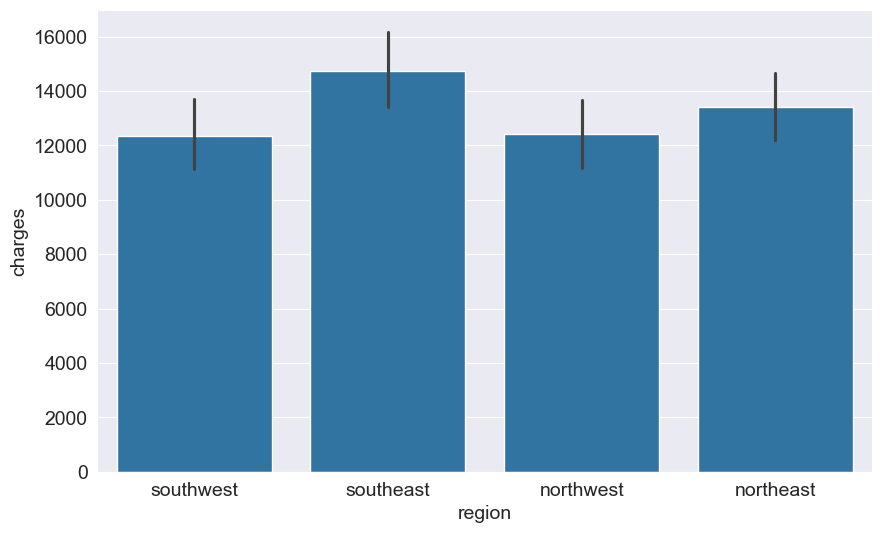

In [173]:
#non binary columns -> like region
sns.barplot(df,x='region', y='charges')

In [174]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [175]:
onehot = enc.transform(df[['region']]).toarray()
df[['northeast','northwest','southeast','southwest']] = onehot
df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_num,northeast,northwest,southeast,southwest,sex_num
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0,1


In [176]:
#create a new model with regions
mod5 = LinearRegression()
inps = df[['age','bmi','children','smoker_num','sex_num','northwest','northeast','southwest','southeast']]
mod5.fit(inps,targs)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [177]:
pred = mod5.predict(inps)
rmse(pred, targs)

np.float64(6041.6796511744515)

7. Model Improvements

In [178]:
mod5.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   234.0453356 ,   587.00923503,  -373.04175627,
        -448.01281436])

<Axes: >

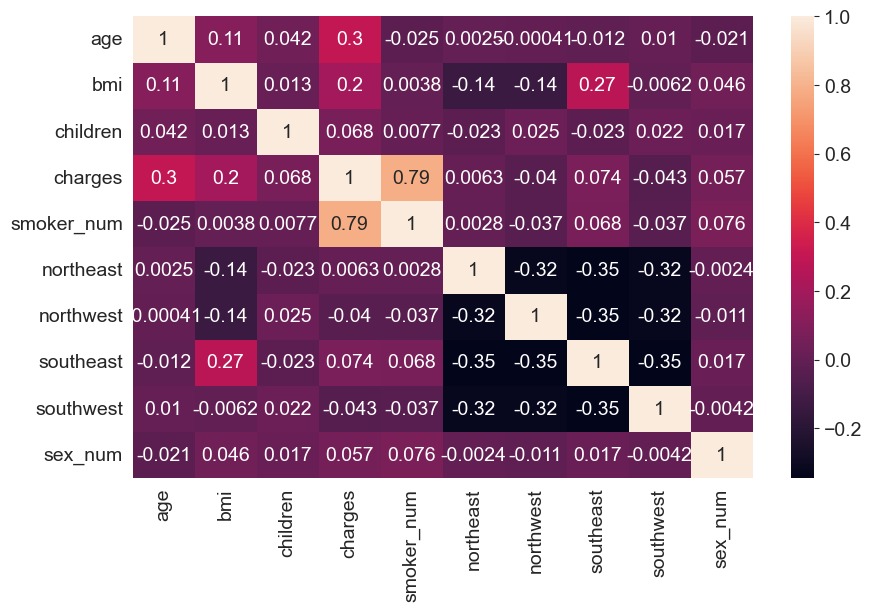

In [181]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
#some columns have different range of values so we need to standardize them on par for comparisons
from sklearn.preprocessing import StandardScaler
numcols = ['age','bmi','children']
scal = StandardScaler()
scal.fit(df[numcols])
scaled = scal.transform(df[numcols])
scaled #standarized values

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [183]:
# mean of each numeric col
scal.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [184]:
#variance of each col
scal.var_


array([197.25385199,  37.16008997,   1.45212664])

In [187]:
catcols = ['smoker_num','sex_num','northwest','northeast','southwest','southeast']
catdata = df[catcols].values
catdata

array([[1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.]], shape=(1338, 6))

In [189]:
inps = np.concatenate((scaled, catdata), axis=1)
targs = df['charges']
mod6 = LinearRegression()
mod6.fit(inps, targs)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [190]:
pred = mod6.predict(inps)
rmse(pred, targs)

np.float64(6041.6796511744515)

In [193]:
weights = pd.DataFrame({
    'feature':numcols+catcols,
    'weights':mod6.coef_
})
weights.sort_values(by='weights',ascending=False)

,feature,weights
3,smoker_num,23848.534542
0,age,3607.472736
1,bmi,2067.691966
6,northeast,587.009235
2,children,572.998210
5,northwest,234.045336
4,sex_num,-131.314359
7,southwest,-373.041756
8,southeast,-448.012814
